In [1]:
import pandas as pd
import sys
sys.path.insert(1, "/home/robbe/ionbot")
import OxiAnalysis as OA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data.csv")

In [3]:
X = data.copy()
y = X.pop("Unnamed: 0")

In [19]:
X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

In [20]:
tsne = TSNE(n_components=2, verbose=1)
tsnedata = tsne.fit_transform(X_scaled) 

/home/robbe/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/home/robbe/miniconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 641 samples in 0.001s...
[t-SNE] Computed neighbors for 641 samples in 0.301s...
[t-SNE] Computed conditional probabilities for sample 641 / 641
[t-SNE] Mean sigma: 2.225870
[t-SNE] KL divergence after 250 iterations with early exaggeration: 64.207069
[t-SNE] KL divergence after 1000 iterations: 0.675164


In [21]:
df = pd.DataFrame()
df["y"] = y
df["comp-1"] = tsnedata[:,0]
df["comp-2"] = tsnedata[:,1]
df.loc[0:14, "Project"] = "PXD014381"
df.loc[15:50, "Project"] = "PXD015122"
df.loc[51:539, "Project"] = "PXD012477"
df.loc[540:587, "Project"] = "PXD016278"
df.loc[588:606, "Project"] = "PXD018549"
df.loc[607:612, "Project"] = "PXD022545"
df.loc[613:630, "Project"] = "PXD008050"
df.loc[631:640, "Project"] = "PXD004010"


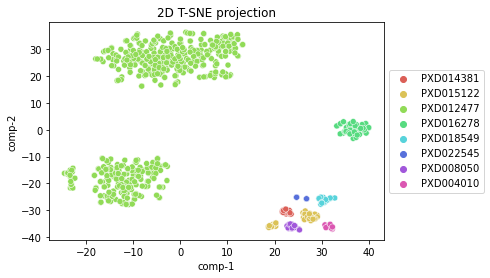

In [23]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.Project.tolist(),
                palette=sns.color_palette("hls", 8),
                data=df).set(title="2D T-SNE projection")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [26]:
treatmentrow = pd.read_csv("Treatmentrow.csv")

In [28]:
treatmentrow = treatmentrow["Treatment"]

In [30]:
data = pd.concat([df,treatmentrow], axis=1)

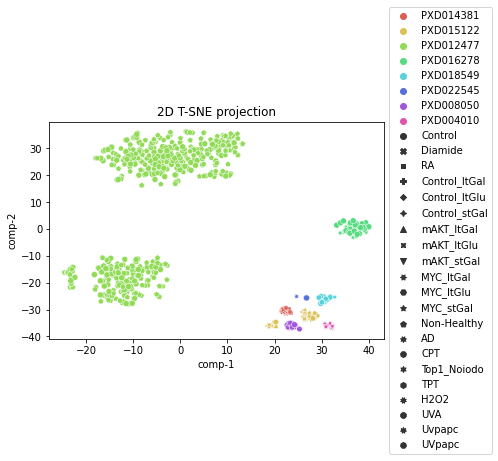

In [33]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.Project.tolist(),
                palette=sns.color_palette("hls", 8),
                data=data, style="Treatment").set(title="2D T-SNE projection")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [38]:
Timepoint = pd.read_csv("/home/robbe/ionbot/PCA_ML/pca_df_with_ann2.csv", sep=";")["Timepoint"]

In [40]:
data = pd.concat([data, Timepoint], axis=1)

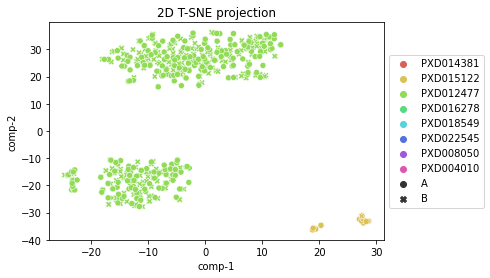

In [43]:
sns.scatterplot(x="comp-1", y="comp-2", hue=df.Project.tolist(),
                palette=sns.color_palette("hls", 8),
                data=data, style="Timepoint").set(title="2D T-SNE projection")
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))